In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/train'
valid_path = '/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/validation'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/train/*')

In [ ]:
folders


['/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/train/Defective',
 '/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/train/Non defective',
 '/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/train/Non_defective']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 482 images belonging to 3 classes.


In [ ]:
val_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1936 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/20
16/16 [==============================] - 1061s 69s/step - loss: 6.8241 - accuracy: 0.5436 - val_loss: 6.7036 - val_accuracy: 0.5362
Epoch 2/20
16/16 [==============================] - 564s 37s/step - loss: 2.6033 - accuracy: 0.7054 - val_loss: 1.4670 - val_accuracy: 0.7800
Epoch 3/20
16/16 [==============================] - 569s 37s/step - loss: 1.4567 - accuracy: 0.8050 - val_loss: 1.2290 - val_accuracy: 0.8011
Epoch 4/20
16/16 [==============================] - 563s 37s/step - loss: 0.9733 - accuracy: 0.8112 - val_loss: 1.2161 - val_accuracy: 0.8120
Epoch 5/20
16/16 [==============================] - 564s 37s/step - loss: 0.5612 - accuracy: 0.8921 - val_loss: 1.0139 - val_accuracy: 0.8197
Epoch 6/20
16/16 [==============================] - 559s 37s/step - loss: 0.4487 - accuracy: 0.8838 - val_loss: 1.0423 - val_accuracy: 0.8202
Epoch 7/20
16/16 [==============================] - 563s 37s/step - loss: 0.3279 - accuracy: 0.8983 - val_loss: 0.9991 - val_accuracy: 0.8166
Epoch

In [ ]:
import matplotlib.pyplot as plt

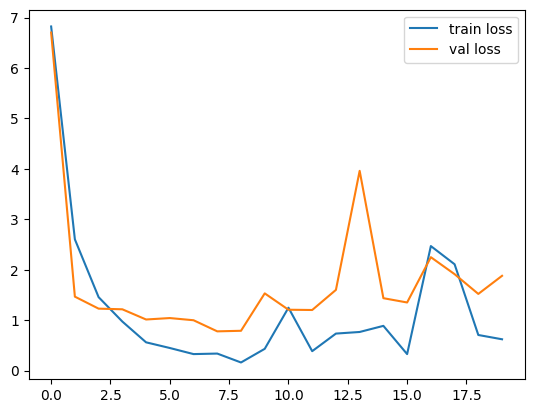

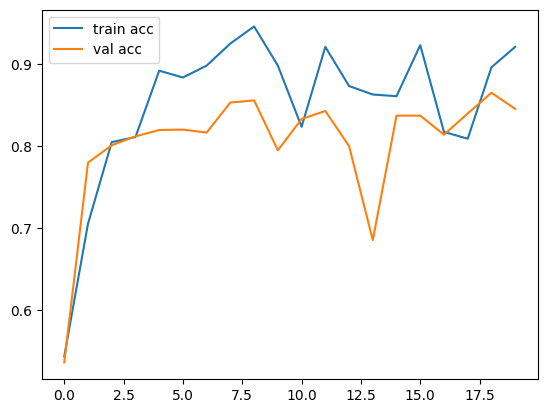

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(val_set)

61/61 [==============================] - 399s 6s/step


In [ ]:
y_pred

array([[9.5359010e-01, 4.6409935e-02, 0.0000000e+00],
       [8.4504468e-24, 9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00],
       ...,
       [9.9999994e-01, 6.9467437e-10, 0.0000000e+00],
       [4.0365421e-17, 9.9999994e-01, 0.0000000e+00],
       [1.2502212e-06, 9.9999875e-01, 0.0000000e+00]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
y_true = val_set.classes

In [ ]:
y_true

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from scipy import stats

In [ ]:
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

In [ ]:
precision

0.5035383777898748

In [ ]:
recall

0.5056818181818182

In [ ]:
confusion = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[377 567]
 [390 602]]


In [ ]:
z_scores = stats.zscore(y_pred)
print('Z-scores:')
print(z_scores)

Z-scores:
[-1.23455253  0.81001009  0.81001009 ... -1.23455253  0.81001009
  0.81001009]


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
import os

In [ ]:
model=load_model('model_inception.h5')

#Test

In [ ]:
img=image.load_img('/content/drive/MyDrive/Master Thesis/DDD/Prepared_Data/validation/Defective/131051004_382613492830631_1306891331783850055_n (2).jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[220., 216., 207.],
        [219., 217., 205.],
        [206., 202., 191.],
        ...,
        [ 37.,  37.,  29.],
        [ 80.,  71.,  62.],
        [ 70.,  70.,  46.]],

       [[201., 193., 182.],
        [202., 196., 182.],
        [192., 184., 171.],
        ...,
        [ 45.,  46.,  41.],
        [ 39.,  41.,  28.],
        [110., 132.,  93.]],

       [[219., 207., 191.],
        [197., 185., 169.],
        [187., 175., 161.],
        ...,
        [ 45.,  45.,  37.],
        [ 69.,  73.,  56.],
        [ 83., 112.,  56.]],

       ...,

       [[ 36.,  34.,  37.],
        [ 17.,  15.,  16.],
        [104., 103.,  99.],
        ...,
        [213., 194., 177.],
        [197., 189., 168.],
        [ 91., 103.,  63.]],

       [[ 13.,  11.,  14.],
        [105., 103., 104.],
        [153., 152., 147.],
        ...,
        [212., 189., 171.],
        [192., 171., 154.],
        [134., 117.,  99.]],

       [[ 79.,  77.,  78.],
        [180., 179., 177.],
        [191., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[9.9245048e-01, 7.5495993e-03, 1.7168551e-16]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 151ms/step


In [ ]:
a==1

array([False])